# <center> <h1>Assignment 5</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

Click the link below and download the file named "auto_mpg_modified.csv".<br/>
Link: https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_modified.csv<br/>
You can find more info about the data set <a href="https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_info.txt">here</a>. 

### Questions:
1) Read the file and create a dataframe and name it "df".<br/>
2) Perform the following data preprocessing:<br/>
a) Remove uncessary column(s) that cannot be used for training any models. Remove from df. Explain why you choose those column(s).<br/>
b) Determine any missing data point in df. Replace those missing data points with an imputated value. <br/>
c) Make sure columns labaled as "multi-valued discrete" are of integer type while "continuous" ones are of float type. You can read the column labels in this <a href="https://sites.google.com/site/yasinunlu/home/research/new1/auto_mpg_info.txt">file</a>. The final dataframe should be named "df_clean".<br/>
3) Prepare the following dataframes.<br/> 
a) Create a dataframe called "response" including only the column "mpg".<br/>
b) Create a dataframe called "features" with the remaining columns.<br/>
c) Prepare a dataframe named "features_train": random 80% rows of the dataframe "features"<br/>
d) Prepare a dataframe named "features_test": random 20% rows of the dataframe "features"<br/>
e) Prepare a dataframe named "response_train": random 80% rows of the dataframe "response"<br/>
f) Prepare a dataframe named "response_test": random 20% rows of the dataframe "response"<br/>
4) Create a multiple linear regressoin model from scikit learn package. Train your model using the train data that you created above. <br/>
5) Produce predictions over the test data.<br/>
6) Evaluate the model performance over the test data by tabulating metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error.<br/>
7) Normalize the data stored in df_clean. <br/>
8) Fit a multiple linear regression model using the normalized data.<br/>
9) Extract Feature Importance. That is, repor the coefficients (i.e. estimated parameters) of the fit model.<br/>
10) Summarize results with a bar chart.<br/>

### Bonus Questions:
11) Analyze the results from the bar chart. Drop one or two least important features from df_clean.<br/>
12) Repeat Questions 3 - 6 and report the updated metrics of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error. Compare the updated metric results agains the previous ones. 

In [100]:
#work on your code here and after.
import pandas as pd
#Question:1
df = pd.read_csv("D:\\Python Programming\\week7\\auto_mpg_modified.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693,11.5,70,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436,11.0,70,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433,12.0,70,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449,10.5,70,1.0,ford torino


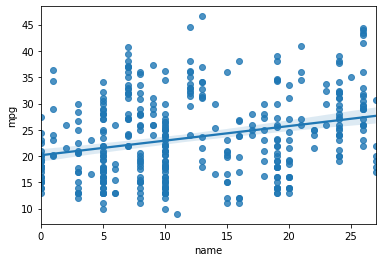

In [101]:
#Question:2.a
#Replacing different name of car name of same type with common name and then use LavelEncoder to catagorize
df['name']= df['name'].str.split(" ").str.get(0)
df['name'] = df['name'].replace(['chevroelt','chevy'],'chevrolet')
df['name'] = df['name'].replace(['vokswagen','vw'],'volkswagen')
df['name'] = df['name'].replace('maxda','mazda')
df['name'] = df['name'].replace('toyouta','toyota')
df['name'] = df['name'].replace('mercedes','mercedes-benz')
df['name'] = df['name'].replace('nissan','datsun')
df['name'] = df['name'].replace('capri','ford')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['name']= le.fit_transform(df['name']).astype('int64')
import seaborn as sns
sns.regplot(x=df['name'],y=df['mpg'])

In [102]:
### Here we can see relation between Name columns and MPG follow weak linear pattern hence it's better to drop it.

In [103]:
df.drop(['name'],axis=1,inplace=True)

In [104]:
#Question:2.b
print(df.isna().sum())

mpg             0
cylinders       4
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          7
dtype: int64


In [105]:
print("Skewness of cylinders columns:",df.cylinders.skew())
print("Skewness of origin columns:",df.origin.skew())
print("Skewness of horsepower columns:",df.horsepower.skew())

Skewness of cylinders columns: 0.5490839740687213
Skewness of origin columns: 0.9261199083174004
Skewness of horsepower columns: 1.0873262824048695


In [106]:
# As, we can see the the cylender column slightly skewed, it's better to replace missing value with mean value.
# But, for origin and horsepower columns which are highly skewed, it's better to replace with mediam value.

In [107]:
df.cylinders.fillna(df.cylinders.mean(),inplace = True)
df.horsepower.fillna(df.horsepower.median(),inplace =True)
df.origin.fillna(df.origin.median(),inplace = True)

In [108]:
#Question:2.c
cols=['cylinders','origin']
df[cols]=df[cols].astype('int64')
df['weight']=df[['weight']].astype('float64')
df_clean = df.copy()

In [109]:
#Question:3.a
response = df_clean['mpg']

In [110]:
#Question:3.b
features = df_clean.drop(columns = ['mpg'],axis=1)

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit_transform(features)
features=pd.DataFrame(scaler,columns=features.columns.tolist())

In [117]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3).fit_transform(features)
features= pd.DataFrame(poly)
features

,0,1,2,3,4,5,6,7,8,9,...,9129,9130,9131,9132,9133,9134,9135,9136,9137,9138
0,1.0,1.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,1.00,...,0.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
1,1.0,1.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,1.00,...,0.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
2,1.0,1.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,1.00,...,0.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
3,1.0,1.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,1.00,...,0.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
4,1.0,1.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,1.00,...,0.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.0,1.0,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.04,...,1.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
394,1.0,1.0,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5,0.04,...,1.0,0.5,0.25,0.25,0.125,0.0625,0.125,0.0625,0.03125,0.015625
395,1.0,1.0,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.04,...,1.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000
396,1.0,1.0,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.04,...,1.0,0.0,0.00,0.00,0.000,0.0000,0.000,0.0000,0.00000,0.000000


In [121]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boo

In [118]:
#Question:3.c -3.f
from sklearn.model_selection import train_test_split
features_train,features_test,response_train,response_test = train_test_split(features,response,test_size = 0.2,random_state=42,shuffle=True)

In [119]:
#Question:4
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(features_train,response_train)
print(lm.score(features_train,response_train))
print(lm.score(features_test,response_test))

1.0
-17.810789136955165


In [120]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha=3)
rg.fit(features_train,response_train)
print(rg.score(features_train,response_train))
print(rg.score(features_test,response_test))

0.903423902170136
0.9033203983048254


In [116]:
from sklearn.linear_model import Lasso
for alpha in [0.2,0.1]:
    for max_iter in [35000,40000]:
        rg = Lasso(alpha,max_iter=85000)
        rg.fit(features_train,response_train)
        print("Traning R:",rg.score(features_train,response_train))
        print("Test R:",rg.score(features_test,response_test))
    

Traning R: 0.807199204988435
Test R: 0.8547935893029701
Traning R: 0.807199204988435
Test R: 0.8547935893029701
Traning R: 0.8266652180917106
Test R: 0.8623725805905547
Traning R: 0.8266652180917106
Test R: 0.8623725805905547


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,64.0,2456.0,...,12278016.0,42048.0,245280.0,3504.0,144.00,840.0,12.0,4900.0,70.0,1.0
1,1.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,64.0,2800.0,...,13638249.0,42469.5,258510.0,3693.0,132.25,805.0,11.5,4900.0,70.0,1.0
2,1.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,64.0,2544.0,...,11806096.0,37796.0,240520.0,3436.0,121.00,770.0,11.0,4900.0,70.0,1.0
3,1.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,64.0,2432.0,...,11785489.0,41196.0,240310.0,3433.0,144.00,840.0,12.0,4900.0,70.0,1.0
4,1.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,64.0,2416.0,...,11895601.0,36214.5,241430.0,3449.0,110.25,735.0,10.5,4900.0,70.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,16.0,560.0,...,7784100.0,43524.0,228780.0,2790.0,243.36,1279.2,15.6,6724.0,82.0,1.0
394,1.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,16.0,388.0,...,4536900.0,52398.0,174660.0,4260.0,605.16,2017.2,49.2,6724.0,164.0,4.0
395,1.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,16.0,540.0,...,5267025.0,26622.0,188190.0,2295.0,134.56,951.2,11.6,6724.0,82.0,1.0
396,1.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,16.0,480.0,...,6890625.0,48825.0,215250.0,2625.0,345.96,1525.2,18.6,6724.0,82.0,1.0


In [83]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boo

In [14]:
#Question:5
response_predict = lm.predict(features_test)
response_predict

array([32.82878714, 29.70180906, 21.38032373, 16.67828128, 12.37935761,
       27.15257909, 28.06970952,  9.85444173, 16.6900465 , 22.01060617,
       12.78499103, 36.10136976, 25.25424223, 13.54102974, 24.14449772,
        6.3647727 , 29.65702529, 23.41090586, 16.34614091, 36.2442116 ,
       22.51676614, 18.94635623, 28.75241292, 28.82862869, 14.84124842,
       34.72566236, 25.49551819, 25.12943329, 22.02510432,  8.80472591,
       28.59657068, 34.89637479, 20.4856667 , 26.04171387, 34.19251932,
       11.99164645, 22.81728856, 21.60478583, 12.21146992, 26.76788903,
       26.16011602, 27.44594068, 20.19561141,  7.21545206, 24.51570996,
       34.93516068, 26.79633559, 24.24067405, 22.53931343, 27.56810276,
       22.84443119, 33.60521571, 32.65079024, 10.97033312, 27.62873173,
       10.01532641, 19.72436533, 29.89430785, 23.32301981, 20.48897653,
       16.10537327, 32.03948319, 24.18100405, 20.56418242, 20.89358982,
       25.47299771, 25.30645849, 32.47694205, 28.1876201 , 12.57

In [15]:
#Question:6
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
print('Mean Absolute Error:',mean_squared_error(response_test,response_predict))
print('Mean Squared Error:',mean_absolute_error(response_test,response_predict))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(response_test,response_predict)))

Mean Absolute Error: 8.125035336725961
Mean Squared Error: 2.2509259360486653
Root Mean Squared Error: 2.8504447612128816


In [16]:
#Question:7
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df_clean = scaler.fit_transform(df_clean)
df_clean = pd.DataFrame(df_clean, columns = df.columns.to_list())
df_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [17]:
#Question:8
response = df_clean['mpg']
features = df_clean.drop(columns = ['mpg'],axis =1)
features_train,features_test,response_train,response_test = train_test_split(features,response,test_size = 0.2,random_state=42)
lm = LinearRegression()
lm.fit(features_train,response_train)

LinearRegression()

In [23]:
type(importance)

numpy.ndarray

In [24]:
#Question:9
importance = lm.coef_
feature_names = df_clean.columns.to_list()
feature_names.remove('mpg')
# summarize feature importance
for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

cylinders: -0.03997
displacement: 0.16440
horsepower: -0.06459
weight: -0.63294
acceleration: 0.03261
year: 0.25424
origin: 0.06686


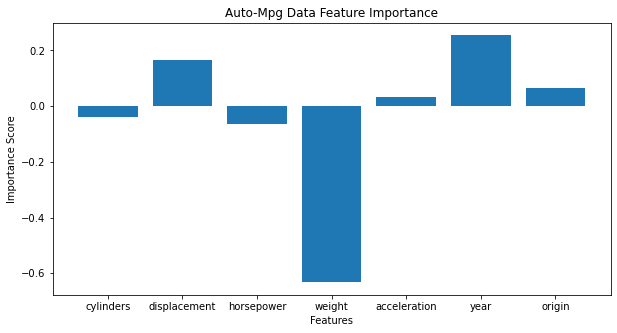

In [19]:
#Question:10
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Auto-Mpg Data Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

In [20]:
### Question:11
### From Barchart it is evident that 'weight' is most important factor deceiding 'mpg. 
###t From the vasulizations it's evident that dropping 'cylinders' column weak linear relation with MPG.
### So, it's better to drop it for better RMSE.

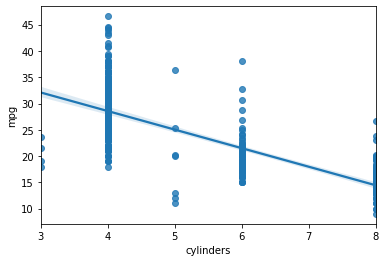

In [21]:
sns.regplot(x=df['cylinders'],y=df['mpg'])

In [22]:
df_clean.drop(columns=['cylinders'],inplace = True)
df_clean.head()

,mpg,displacement,horsepower,weight,acceleration,year,origin
0,0.239362,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,0.159574,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,0.239362,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,0.186170,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,0.212766,0.604651,0.510870,0.520556,0.148810,0.0,0.0


In [23]:
#Question:12
response = df_clean['mpg']
features = df_clean.drop(columns = ['mpg'],axis =1)
from sklearn.model_selection import train_test_split
features_train,features_test,response_train,response_test = train_test_split(features,response,test_size = 0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(features_train,response_train)
lm.score(features_train,response_train)
response_predict = lm.predict(features_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_squared_error(response_test,response_predict))
print('Mean Squared Error:',mean_absolute_error(response_test,response_predict))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(response_test,response_predict)))

Mean Absolute Error: 0.005892430648182464
Mean Squared Error: 0.05990543982876806
Root Mean Squared Error: 0.07676216938168477
